<a href="https://colab.research.google.com/github/anushabhuchupalli/ML-lab/blob/main/Univariate2_regression_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [ ]:
#Load the data
df=pd.read_csv("/content/company.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [ ]:
#Create feature and target array from such given data
x=df.drop('Sales',axis=1).values
y=df['Sales'].values
y.shape

(200,)

In [ ]:
k=df.corr()
k

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

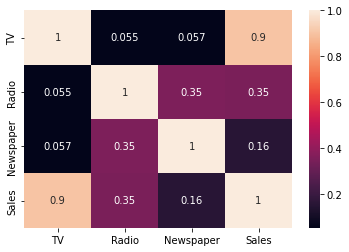

In [ ]:
import seaborn as sns
sns.heatmap(k, annot=True)

In [ ]:
X=df['TV'].values
X.shape

(200,)

In [ ]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X.shape,y.shape

((200, 1), (200, 1))

In [ ]:
#Splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape


((150, 1), (50, 1), (150, 1), (50, 1))

In [ ]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

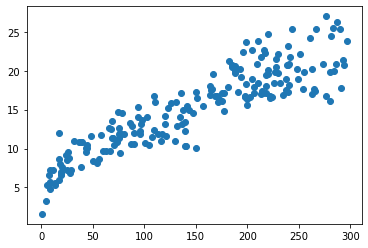

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_train)
print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')


MAE = 1.8203818541994503
MSE = 5.136151288979386
RMSE = 2.2663078539729296
R_2 = 0.811194552365148


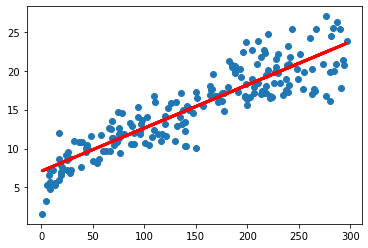

In [ ]:
plt.scatter(X,y)
plt.plot(X_train, y_pred, color='red', linewidth=3)


In [ ]:
y_pr = reg.predict(X_test)


In [ ]:
print(f'MAE = {mean_absolute_error(y_test, y_pr)}')
print(f'MSE = {mean_squared_error(y_test, y_pr)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pr))}')
print(f'R_2 = {r2_score(y_test, y_pr)}')


MAE = 1.8651146911099161
MSE = 5.513351187165511
RMSE = 2.3480526372220685
R_2 = 0.7971876919875108
